### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [28]:
# Imports 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [10]:
# Independent variables
X = np.array(df.drop(["duracion"], axis = 1))

# Dependent variable
y = np.array(df["duracion"])

# Model instance
model = linear_model.LinearRegression()

In [11]:
# Model training
model.fit(X, y)

LinearRegression()

### ¿Qué acierto tiene? (score)

In [12]:
model.score(X, y)

0.10198661828479649

In [13]:
# Podemos ver que la duración difícilmente podemos explicarla con el resto de variables del dataset

### ¿Cuál es el RMSE? ¿Dirías que es un valor alto?

In [20]:
mse = mean_squared_error(y, model.predict(X))
rmse = math.sqrt(mse)
print("RMSE:", rmse)

RMSE: 191.28677314018518


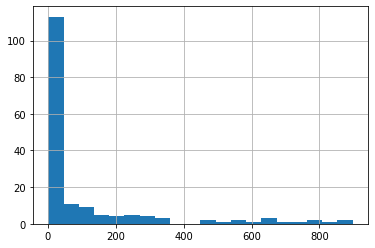

In [23]:
# Para comprobar si es un valor alto, necesitamos ver la distribución de la columna "duracion"

df["duracion"].hist(bins = 20)
plt.show()

In [24]:
duracion_mean = df["duracion"].mean()
duracion_std = np.std(df["duracion"])

print(f"Mean: {duracion_mean}\nStandard Deviation: {duracion_std}")

Mean: 111.0757294117647
Standard Deviation: 201.85687095644477


In [26]:
df[df["duracion"] > 400].count()

duracion    16
paginas     16
acciones    16
valor       16
clase       16
dtype: int64

La mayoría de valores se encuentran entre 0 y 50, y a partir de ahí las observaciones con duracion >50 son menos frecuente.

Por otro lado, tenemos un par de outliers (16 específicamente) con una duración mayor a 400 que son los que están inflando tanto la std como el msae. Esto es probablemente lo que más está estorbando el aprendizaje de nuestro modelo.

### Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?

<AxesSubplot:>

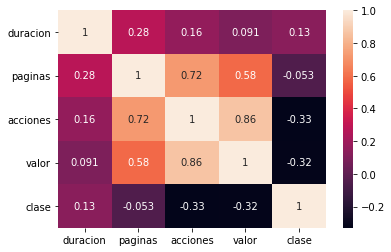

In [29]:
sns.heatmap(df.corr(), annot = True)

Bueno, el resultado del mapa de correlaciones es bastante coherente con el del modelo. Podemos ver que la columna "duracion" tiene una relación baja con el resto, por lo que tiene sentido que al intentar explicar "duracion" con el resto de variables, el resultado no sea óptimo.

### ¿Es la regresión un buen método para este dataset?

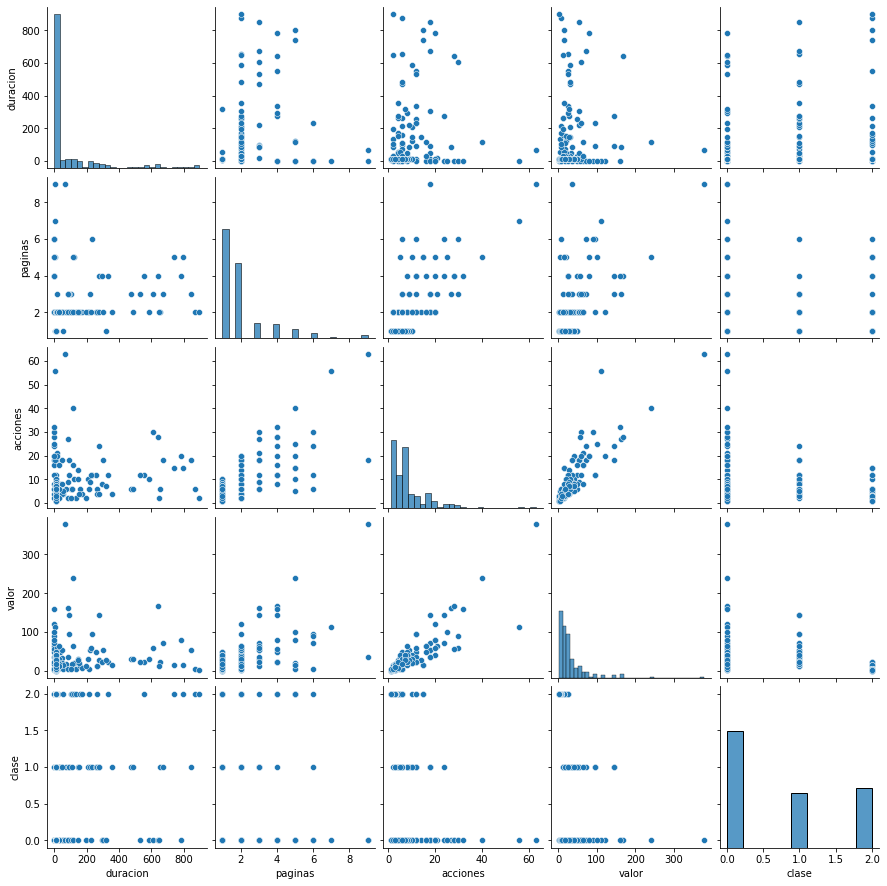

In [30]:
sns.pairplot(df)

Si lo que pretendemos predecir es una variable categórica, la regresión lineal es definitivamente un mal modelo. Sin embargo, para estimar variables númericas, podría ajustarse mejor, aunque no es el caso de la columna "duracion", como ya pudimos comprobar.

Conclusión: para este dataset (dependiendo de la variable que es cogamos como dependiente), la regresión lineal es más bien un modelo limitado.